## Описание проекта  

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Данные имеются до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Знакомство с данными 

Импортируем библиотеки

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

### 1.1 Считывание данных

In [2]:
games = pd.read_csv('games.csv')

Смотрим что да как

In [3]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### 1.2 Описание данных
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Смотрим информацию о датасете

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 1.3 Первичный анализ

Анализируем названия столбцов

In [5]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Считаем количество пустых значений

In [6]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Посмотрим на таблицу с пустыми значениями в столбце year_of_release

In [7]:
games[games['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим на таблицу с пустыми значениями в столбце critic_score.

In [8]:
games[games['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим на таблицу с пустыми значениями в столбце user_score

In [9]:
games[games['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим на таблицу с пустыми значениями в столбце rating

In [10]:
games[games['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим какие платформы имеются

In [11]:
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Посмотрим, что у нас с жанрами

In [12]:
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Проверим датасет на наличие дубликатов

In [13]:
games.duplicated().sum()

0

**Вывод:**  
 - Имеем много пропущенных значений в столбцах Critic_Score, User_Score, Year_of_Release, Rating. Можно попробовать заполнить пропуски в столбце года выпуска, если имеются данные о дате выхода данных игр на иных платформах.  
 Теперь разберемся с tbd. Погуглив можно узнать, что эта аббревиатура расшифровывается как  'To Be Determined' - 'Предстоит определить', что равнозначно пропуску. Пропуски в столбцах с оценкой и рейтингом заполнить не получится, так как это сильно может сказаться на анализе. Предполагаю, что во времена выхода старых игр еще не было сбора оценок и выставления рейтинга и именно они состовляют основную долю пропусков. Эту гипотезу я проверю ниже.
 - Можно заменить тип данных в столбце Year_of_Release для более удобной и корректной работы.

## Подготовка данных

### 2.1 Первичная предобработка данных

Для начала приведем к нижнему регистру названия столбцов

In [14]:
games.columns = games.columns.str.lower()

Поменяем тип данных в столбце year_of_release

In [15]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

### 2.2 Работа с пропусками

Удаляем из year_of_release пропуски.      

In [16]:
games = games.dropna(axis=0, subset=['year_of_release']) 

Исходя из вышесказанного можно заменить tbd на NaN и сразу поменять тип данных на float, чтоб продолжить работу с ним. 

In [19]:
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)
games['user_score'] = games['user_score'].astype(float)

Теперь можно проверить как у нас обстоят дела с пропусками в user_score и годом выпуска

In [20]:
games['year_of_release'][games['user_score'].isnull()== True].value_counts()

2009    812
2010    788
2008    766
2011    635
2007    568
2006    454
2002    365
2005    356
1998    348
2012    314
2015    309
1999    307
2004    273
1997    271
2003    259
1996    255
2014    252
2000    243
2016    240
2013    240
2001    225
1995    219
1994    120
1993     62
1981     46
1992     42
1991     41
1982     36
1986     21
1983     17
1989     17
1990     16
1987     16
1988     14
1984     14
1985     13
1980      9
Name: year_of_release, dtype: Int64

Проделаем то же самое с critic_score

In [21]:
games['year_of_release'][games['critic_score'].isnull() == True].value_counts()

2009    775
2010    755
2008    712
2011    636
2007    505
2006    386
2015    381
1998    351
2012    332
2014    320
1999    299
2005    284
1997    272
2013    271
2016    270
1996    255
1995    219
2000    207
2002    202
2004    201
2003    190
2001    156
1994    120
1993     62
1981     46
1992     42
1991     41
1982     36
1986     21
1983     17
1989     17
1990     16
1987     16
1988     14
1984     14
1985     13
1980      9
Name: year_of_release, dtype: Int64

Ну и rating до кучи проверим

In [22]:
games['year_of_release'][games['rating'].isnull() == True].value_counts()

2010    456
2008    446
2011    433
2009    415
2007    376
1998    347
2006    328
2012    298
1999    296
2015    291
1997    270
1996    256
2014    236
2005    233
2013    228
2016    222
1995    219
2000    202
2002    174
2004    164
2003    162
2001    143
1994    120
1993     62
1981     46
1992     41
1991     41
1982     36
1986     21
1983     17
1989     17
1990     16
1987     16
1988     14
1984     14
1985     13
1980      9
Name: year_of_release, dtype: Int64

**(!)** Зависимости пропусков в данных с датой выхода игр нет.

### 2.3 Суммарные продажи по регионам

Посчитаем суммарные продажи по всем рассматриваемым областям

In [23]:
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [24]:
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1890,Skate 2,X360,2009,Sports,0.82,0.17,0.01,0.09,84.0,8.0,T,1.09
13625,Kids Learn Music A+ Edition,DS,2011,Misc,0.04,0.00,0.00,0.00,NaN,NaN,NaN,0.04
8094,Gokujou Parodius,SNES,1994,Shooter,0.00,0.00,0.18,0.00,NaN,NaN,NaN,0.18
10654,Pinball Hall of Fame: The Williams Collection,3DS,2011,Misc,0.09,0.00,0.00,0.01,67.0,7.3,E10+,0.10
9137,Eternal Poison,PS2,2008,Role-Playing,0.07,0.05,0.00,0.02,65.0,8.2,T,0.14
6472,Final Fantasy V Advance,GBA,2006,Role-Playing,0.00,0.00,0.26,0.01,83.0,7.2,E,0.27
116,Just Dance 4,Wii,2012,Misc,4.05,2.16,0.00,0.55,74.0,7.3,E10+,6.76
9981,Where the Wild Things Are,Wii,2009,Platform,0.11,0.00,0.00,0.01,65.0,NaN,E10+,0.12
8639,The Walking Dead: Season One,XOne,2014,Adventure,0.08,0.06,0.00,0.01,NaN,NaN,NaN,0.15
13169,Ride,PS3,2015,Racing,0.00,0.03,0.01,0.01,NaN,4.8,NaN,0.05


Посмотрим, что у нас осталось

In [25]:
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sum_sales        16446 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' '¡Shin Chan Flipa en colores!' nan]
name : кол-во

Заменим устаревший рейтинг на действующий, а все игры без рейтинга обьединим категорией 'not_reting'

In [26]:
#games['rating'] = np.where((games['rating'] == 'K-A'), 'E', games['rating'])
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'

In [27]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [28]:
games['rating'] = games['rating'].fillna(value='not_reting')

Ибавимся от пропусков в name и genre

In [29]:
games[(games['genre'].isnull()== True) | (games['name'].isnull()== True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,not_reting,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,not_reting,0.03


In [30]:
games.drop([659,14244],inplace=True) 

**Вывод:**  
 - Причесали наши данные (привели названия столбцов к нижниму регистру, изменили типы данных, частично смогли заполнить пропуски в столбце с годом выхода, удалили пропуски).
 - Гипотеза о зависимости пропусков в оценках пользователей и критиков, а так же рейтинга от года выпуска не подтвердилась. Остается скинь вину на сборщиков информации и дать им рекомендации по сбору данных.
 

## Исследовательский анализ данных

### 3.1 Cколько игр выпускалось в разные годы

<AxesSubplot:title={'center':'Количество игр по годам'}, xlabel='Год выпуска', ylabel='Количество выпущенных игр'>

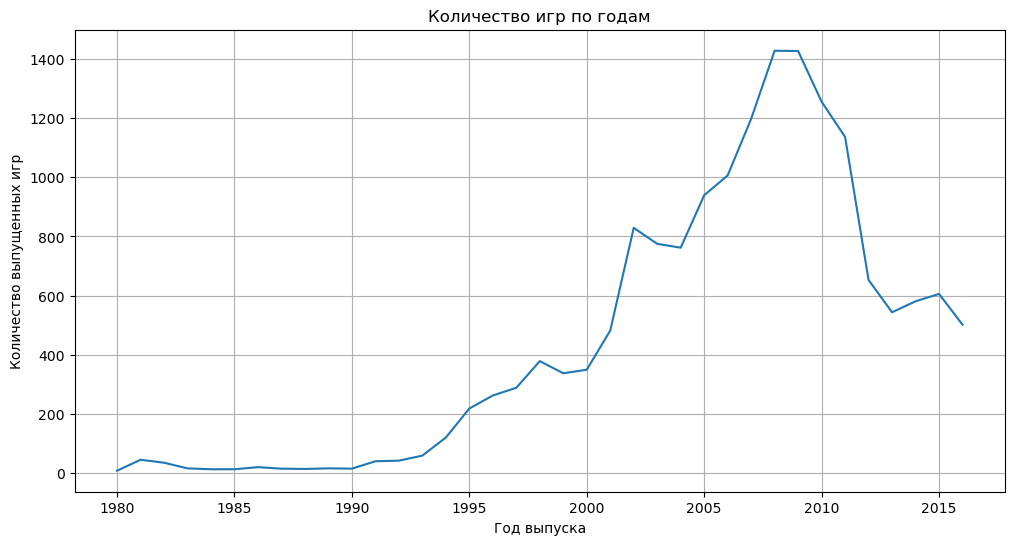

In [31]:
games_by_each_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_by_each_year.plot(title='Количество игр по годам', xlabel='Год выпуска', ylabel='Количество выпущенных игр', grid=True, legend=False, figsize=(12,6))

**(!)** По графику видно, что в период с 1990 по 2007 количество игр ежегодно растет, а в следующий период постепенно падает. Предполагаю, что это произошло из за активного развития социальных сетей, доступного интернета и смены рода времяпрепровождения "играющих лиц". Так же важно отметить, что мобильные игры в этот период стали более конкурентноспособны.

### 3.2 Как менялись продажи по платформам

<AxesSubplot:title={'center':'Продажи по платформам за все время'}, xlabel='Название платформы', ylabel='Количество продаж'>

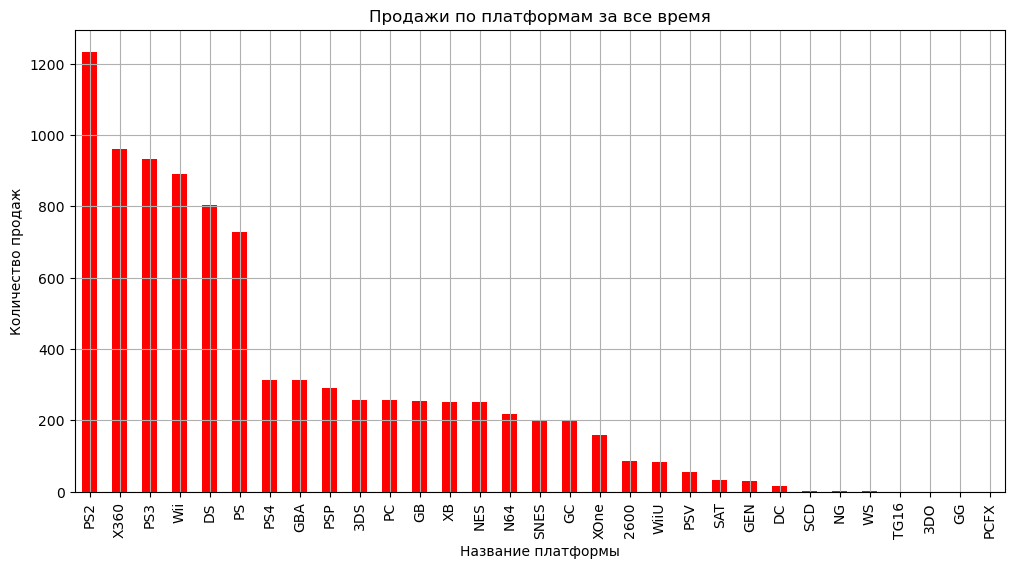

In [32]:
sales_platform = games.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
sales_platform.plot(kind='bar', title='Продажи по платформам за все время', xlabel='Название платформы', ylabel='Количество продаж', grid=True, legend=False, figsize=(12,6), color='r')

**(!)** Cамыми популярными платформами за весь период являются PS2, X360, PS3, WII, DS, PS.

Построим распределения по годам для платформ с наибольшими суммарными продажами

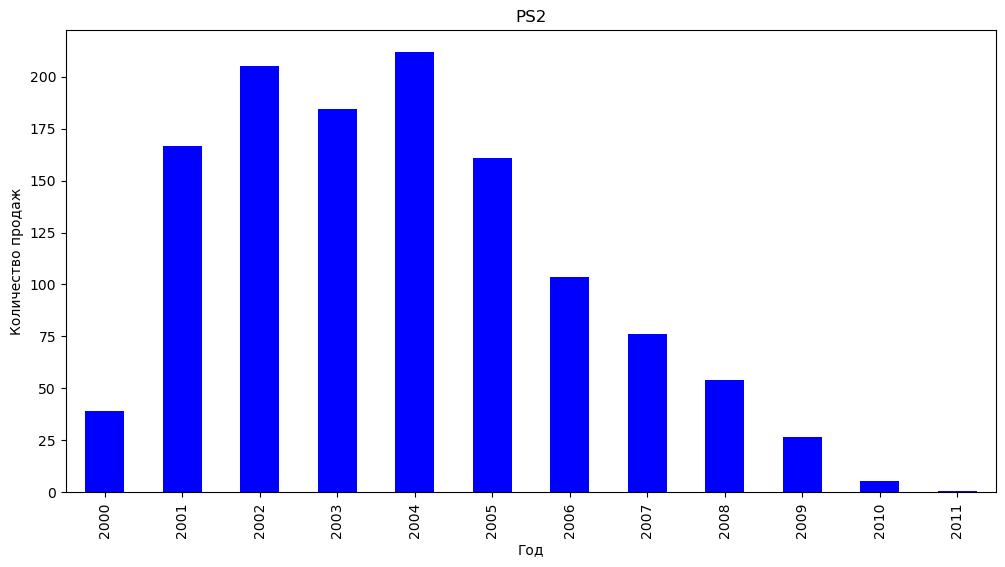

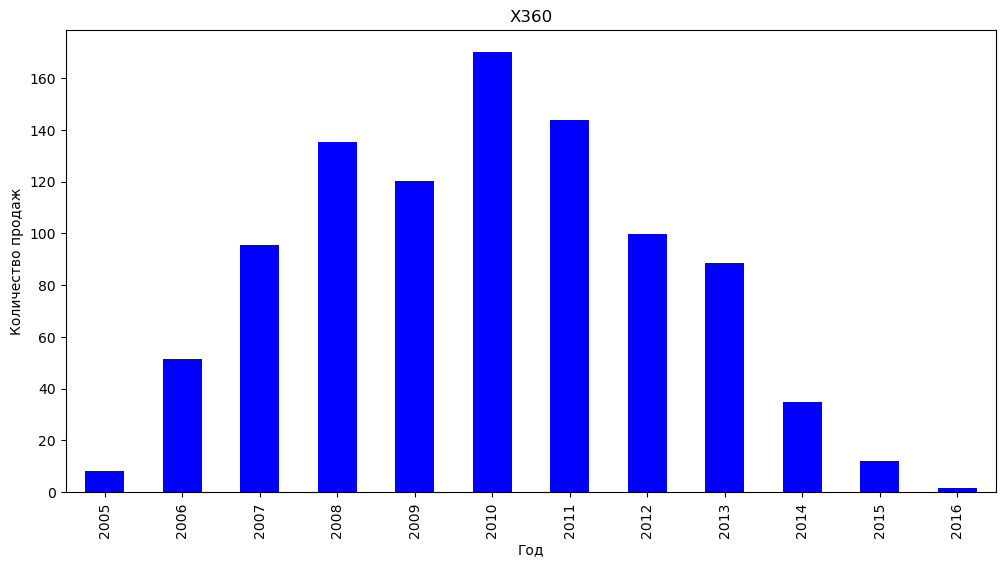

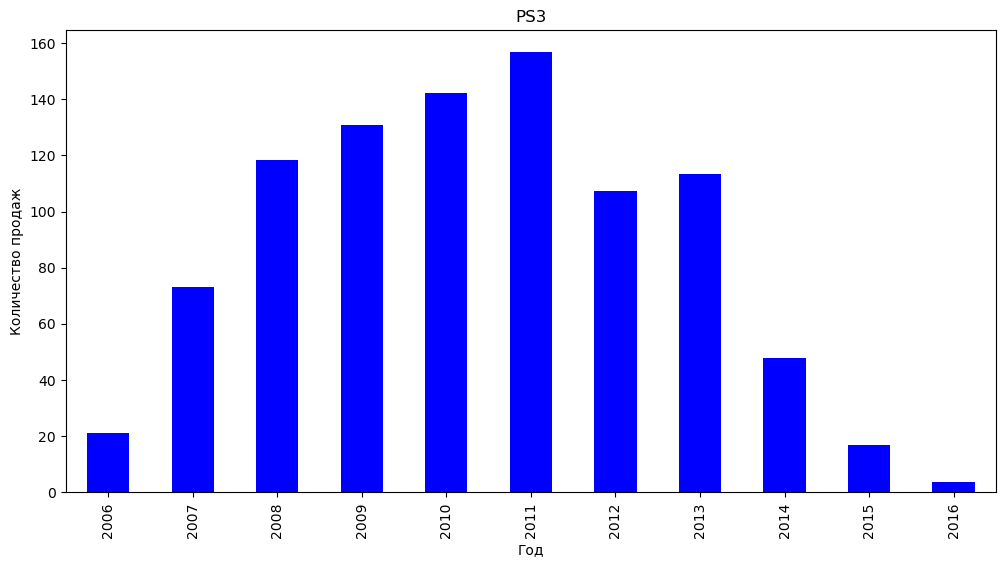

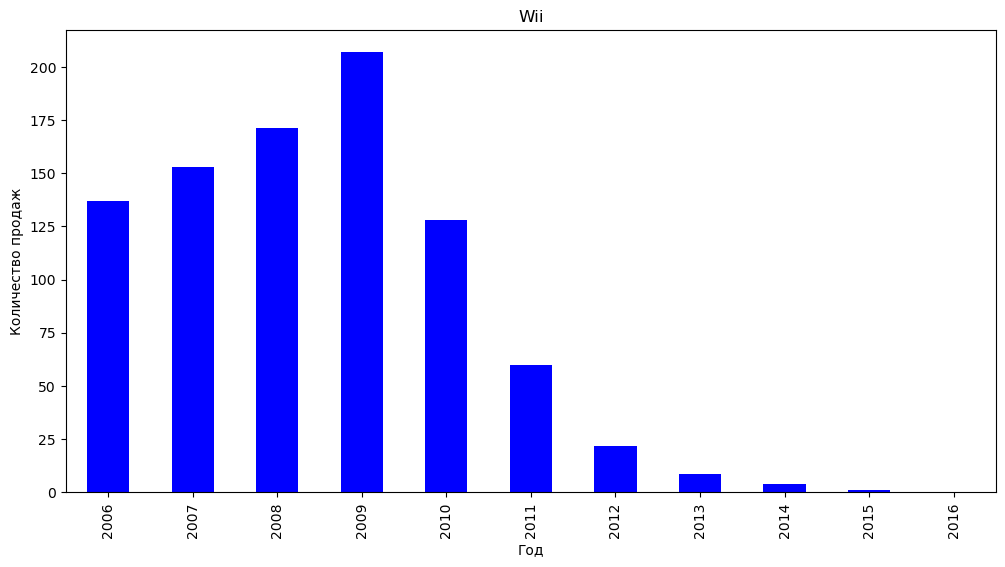

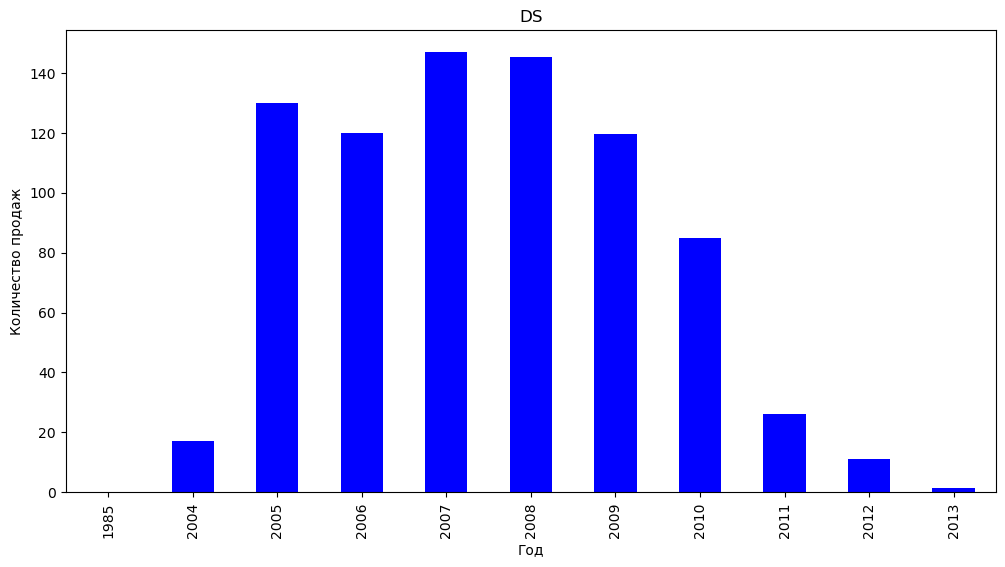

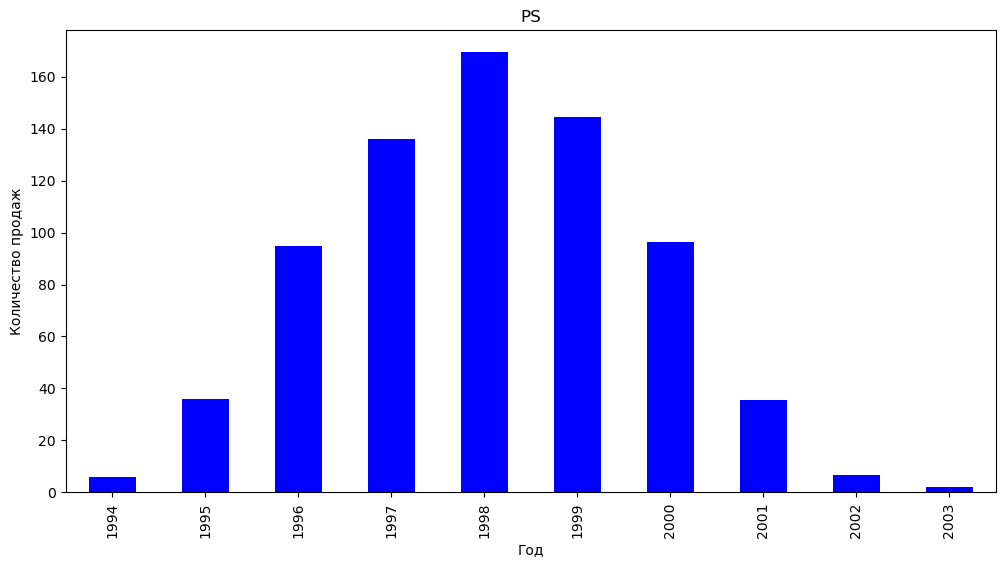

In [33]:
for i in sales_platform[:6].index:
    games[games['platform'] == i].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(
        kind='bar', xlabel='Год', ylabel='Количество продаж', title=i, legend=False, color='blue', figsize=(12,6))

Проверим ту самую выбивающуюся строку

In [34]:
games[(games['platform'] == 'DS') & (games['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,not_reting,0.02


Избавимся от нее

In [35]:
games.drop([15957],inplace=True)    

### 3.3 Определение актуального периода  и выявление лидирующих платформ

Посмотрим топ актуальных игровых платформ за последний год

In [36]:
list_of_platform = games[games['year_of_release'] == 2016].pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
list_of_platform

,sum_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


- По диаграммам можно заметить, что средняя продолжительность жизни игровых платформ составляет около 9 лет.
- Лидеры продаж за весь период уже не являются актуальными на 2016 год, а многие даже ушли с рынка. Их заменило новое поколение от тех же разработчиков игровых плтформ: PS4, XOne, 3DS, WiiU, PS3, PC. Считаю нужным ограничить "актуальный" четверкой последних годов, так как ушедшие платформы уже вряд ли снова появятся на рынке, а текущие платформы на этот момент уже вышли.
- А так же стало ясно как именно кореллирует количество пропусков в рейтинге и оценках с годами выпуска. "Самые пропускаемые года" - это года, в которых выпускается наибольшее количество игр. Следовательно, можно предположить, что система оценки никак не зависит от периода, а является равномерной для всего времени. Чем больше продаж, тем больше людей не оставляющих отзывы.

Выделим актуальный период и оставим только текущее поколение платформ

In [37]:
new_period_games = games[games['year_of_release'] > 2012]

Проанализиуруем выбросы

In [38]:
new_period_games['sum_sales'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: sum_sales, dtype: float64

Среднее сильно отличается от медианы. наглядно продемонстрируем масштабы выбросов

<AxesSubplot:xlabel='platform', ylabel='sum_sales'>

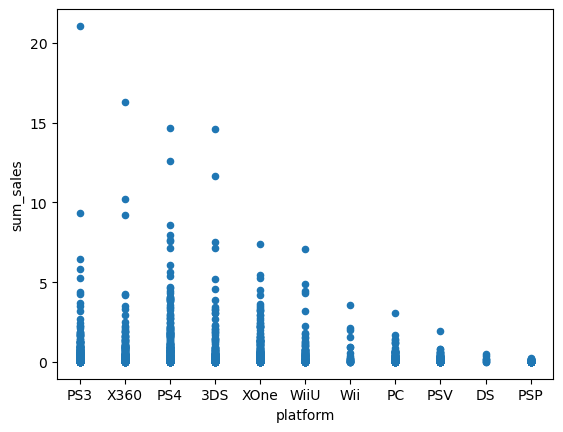

In [39]:
new_period_games.plot(kind='scatter',y='sum_sales',x='platform')

In [40]:
a, b = new_period_games.sum_sales.sum(), games[games['year_of_release'] > 2012].sum_sales.sum()
a, b, round((b-a)/b,3)

(1090.69, 1090.69, 0.0)

Посмотрим на количество выпущенных игр и средние по продажам

In [41]:
new_period_games.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


### 3.4 Глобальные продажи игр в разбивке по платформам

Построим диаграмму размаха

<AxesSubplot:title={'center':'sum_sales'}, xlabel='platform'>

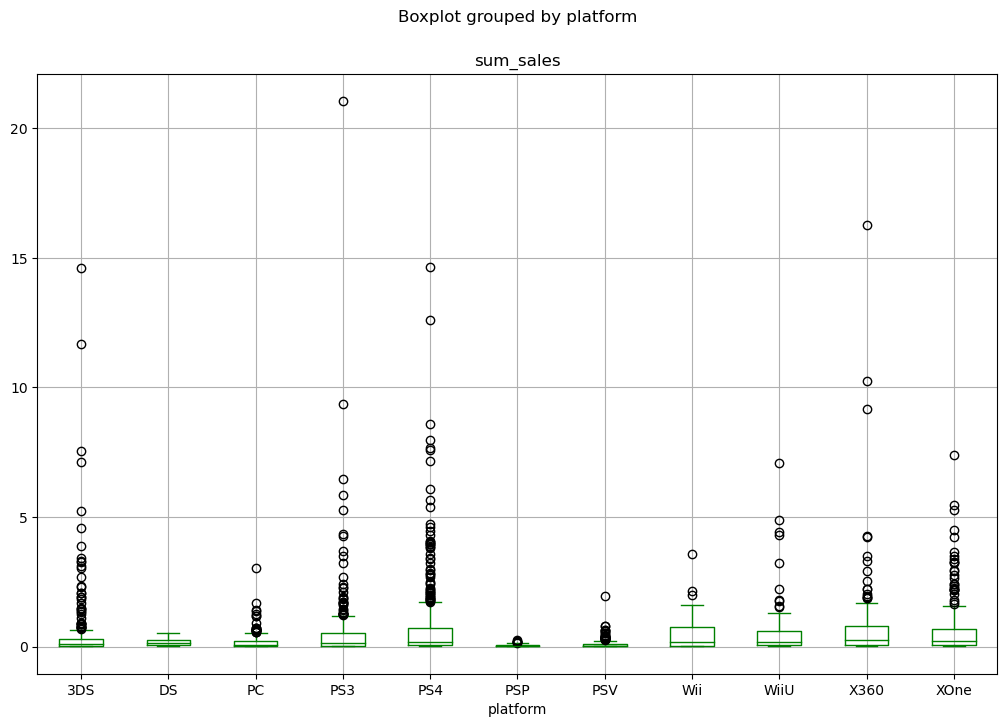

In [42]:
new_period_games.boxplot(column='sum_sales', by='platform', figsize=(12,8), color = 'g')

Масштабируем диаграмму размаха

(0.0, 0.8)

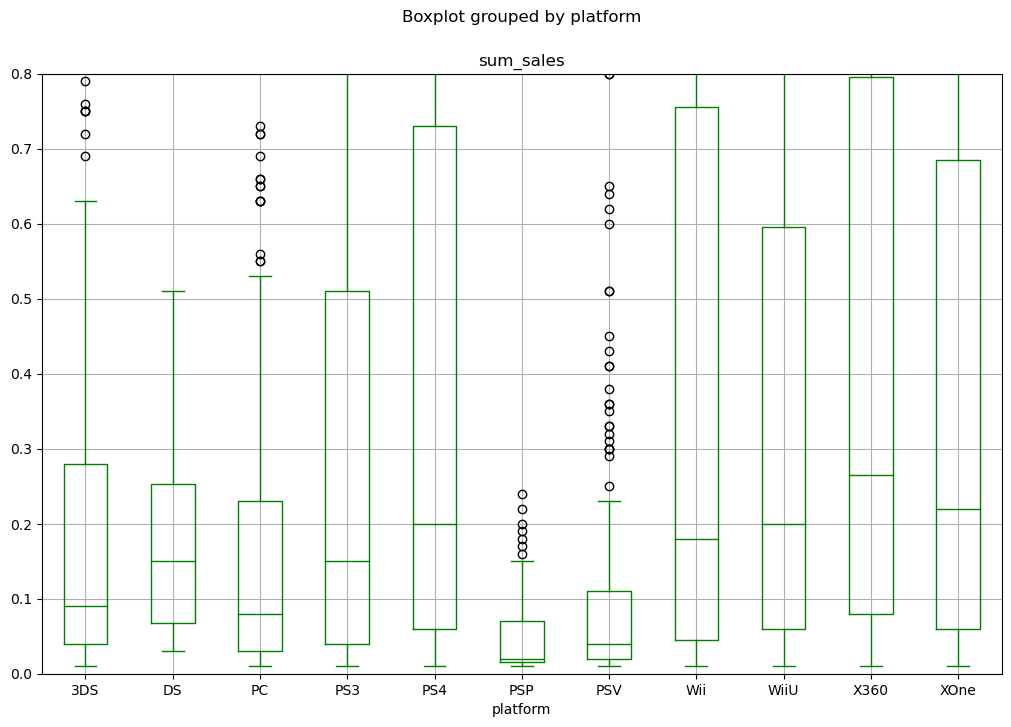

In [43]:
new_period_games.boxplot(column='sum_sales', by='platform', figsize=(12,8), color = 'g')
plt.ylim(0, 0.8)

- Можно заметить, что медиана у всех разная.
- Лидируют X360, XOne и PS4. Успех данных приставаок, вероятно, обусловлен актуальной датой выхода для этого периода. WiiU так же сохраняет одну из лидирующих позиций. 
- PSV и PSP на данном промежутке времени уступают более современным и крутым приставкам.

### 3.5 Влиние отзывов на продажи внутри одной популярной платформы 

Корреляция между оценками пользователей, критиков и продажами внутри одной платформы

In [44]:
print('Корреляция между оценками пользователей и продажами для XOne', '\n',
      new_period_games[new_period_games['platform']=='XOne']['user_score'].corr
      (new_period_games[new_period_games['platform']=='XOne']['sum_sales']))
print('Корреляция между оценками критиков и продажами для XOne', '\n',
      new_period_games[new_period_games['platform']=='XOne']['critic_score'].corr
      (new_period_games[new_period_games['platform']=='XOne']['sum_sales']))

Корреляция между оценками пользователей и продажами для XOne 
 -0.0689250532827942
Корреляция между оценками критиков и продажами для XOne 
 0.4169983280084016


Построим диаграммы рассеяния

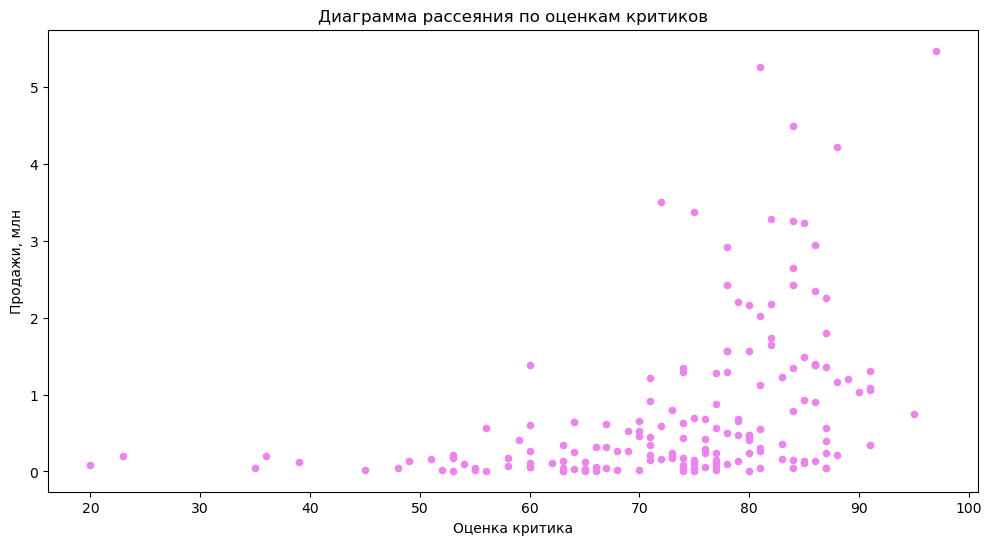

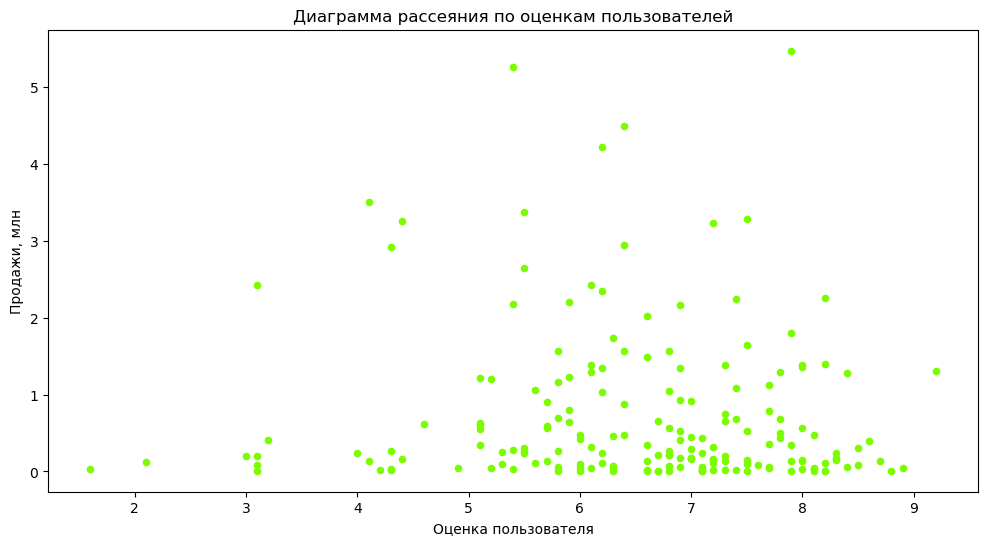

In [45]:
new_period_games[new_period_games['platform']=='XOne'].plot(
    kind='scatter',y='sum_sales',x='critic_score', figsize=(12,6), 
    color = 'violet', title = 'Диаграмма рассеяния по оценкам критиков', 
    xlabel='Оценка критика', ylabel='Продажи, млн')
new_period_games[new_period_games['platform']=='XOne'].plot(
    kind='scatter',y='sum_sales',x='user_score', figsize=(12,6), 
    color = 'lawngreen', title = 'Диаграмма рассеяния по оценкам пользователей', 
    xlabel='Оценка пользователя', ylabel='Продажи, млн')
plt.show()

У XOne наблюдается небольшая связь между оценками критиков и продажами. А связи между оценками пользователей и продажами практически нет. 

### 3.6 Соотнесение выводов с продажами игр на других платформах

Соотнесем выводы с продажами игр на других актуальных платформах, отследив корреляцию

Корреляция между оценками пользователей и продажами для PS4 
 -0.03195711020455646


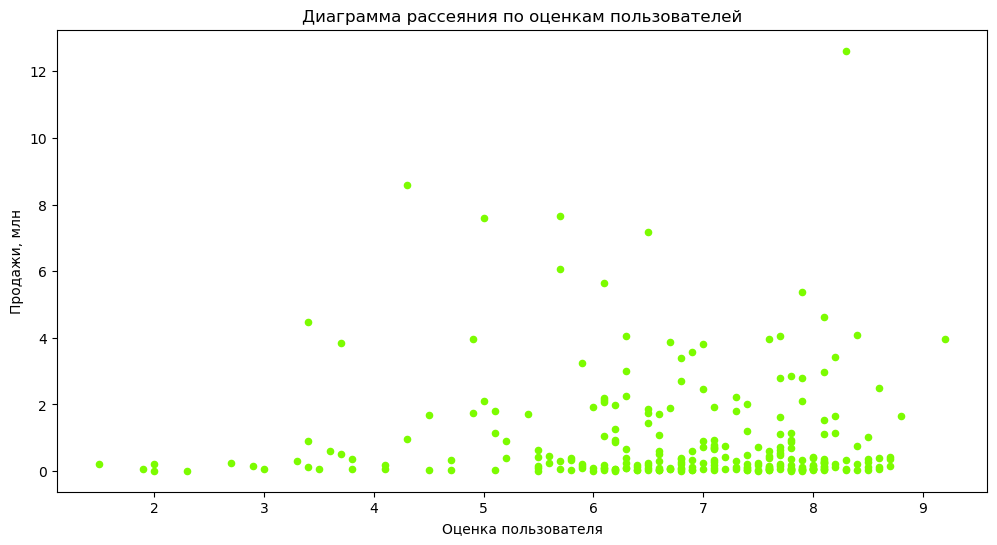

Корреляция между оценками критиков и продажами для PS4 
 0.40656790206178145



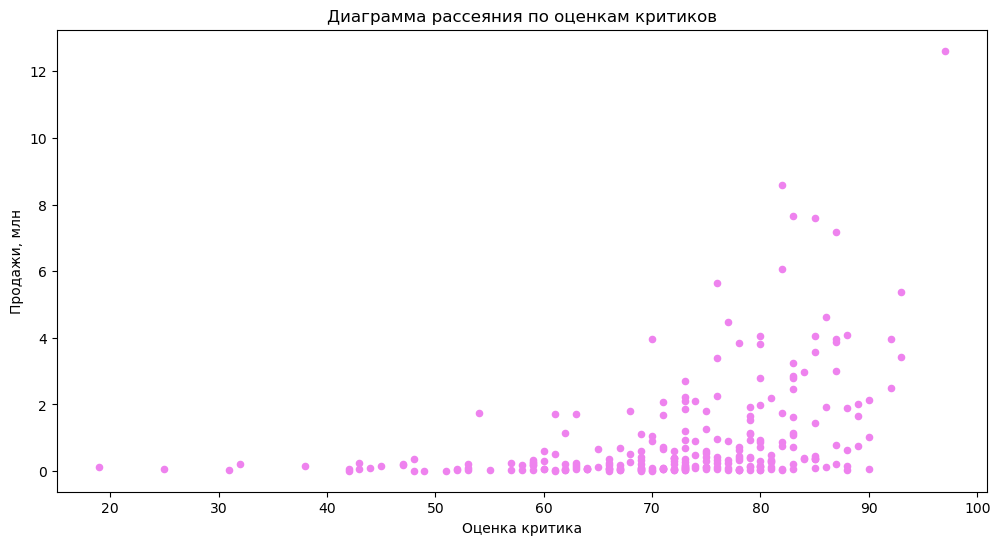


Корреляция между оценками пользователей и продажами для XOne 
 -0.0689250532827942


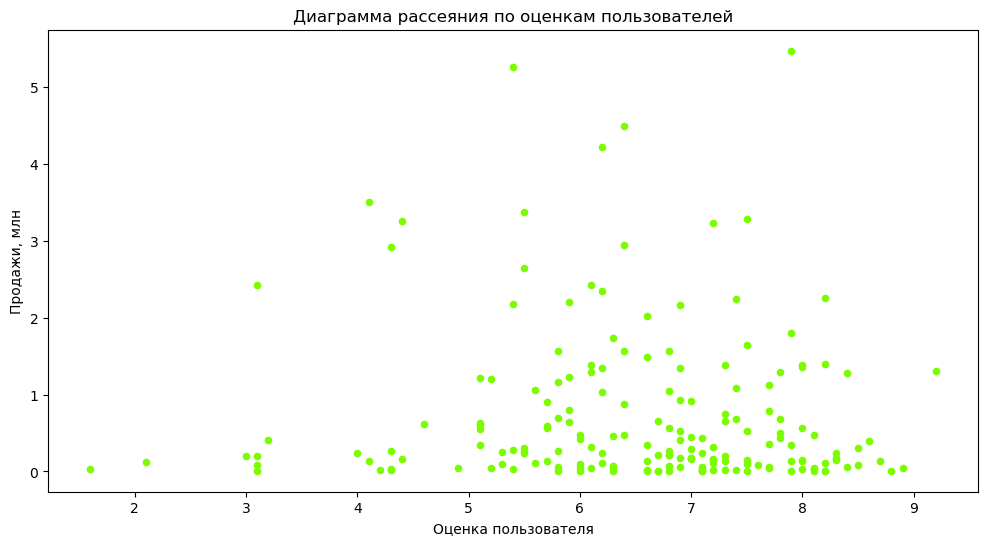

Корреляция между оценками критиков и продажами для XOne 
 0.4169983280084016



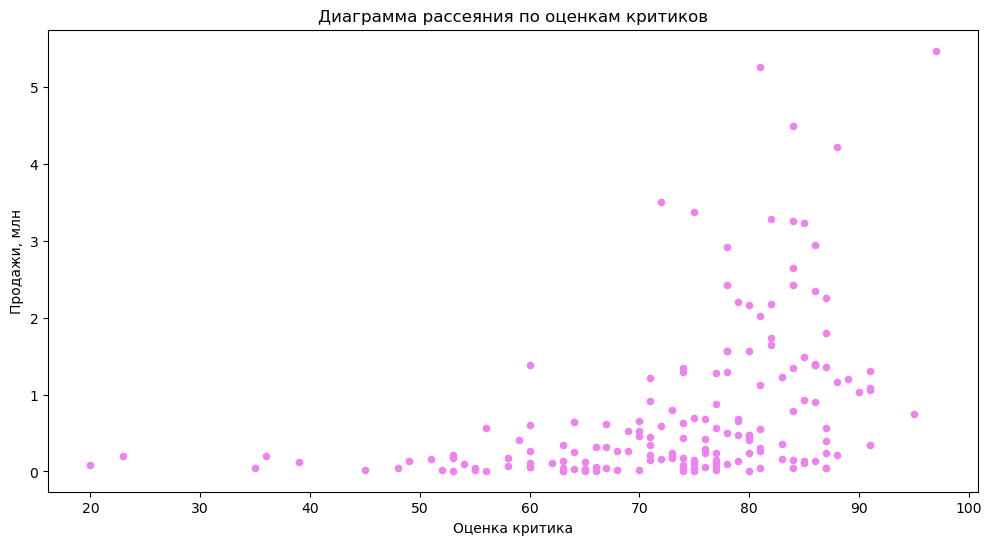


Корреляция между оценками пользователей и продажами для 3DS 
 0.2415041177356301


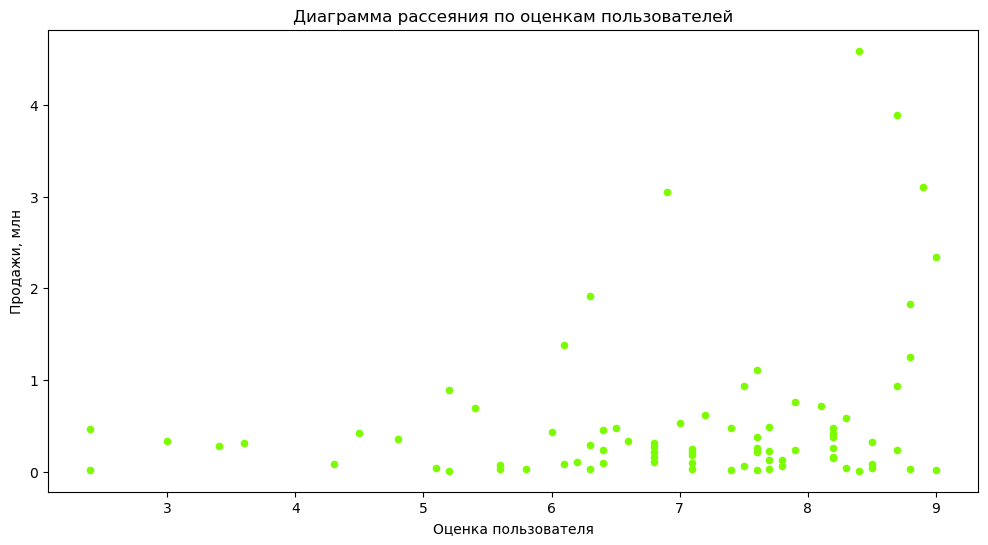

Корреляция между оценками критиков и продажами для 3DS 
 0.35705661422881046



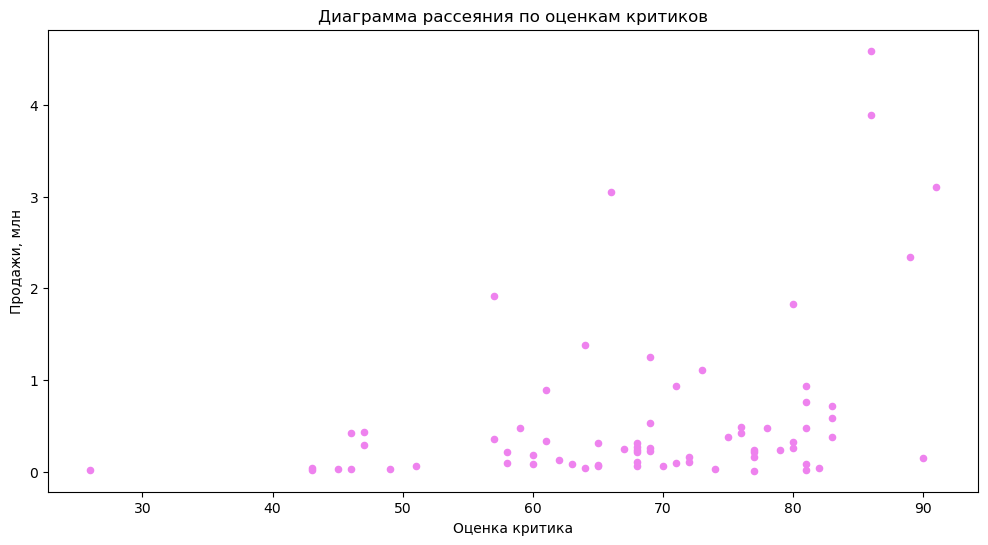


Корреляция между оценками пользователей и продажами для PC 
 -0.09384186952476752


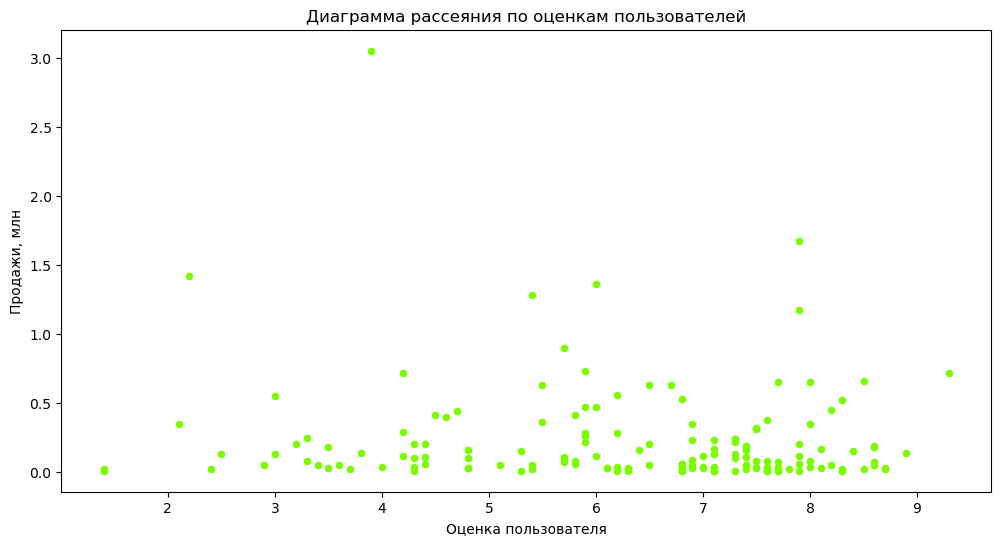

Корреляция между оценками критиков и продажами для PC 
 0.19603028294369362



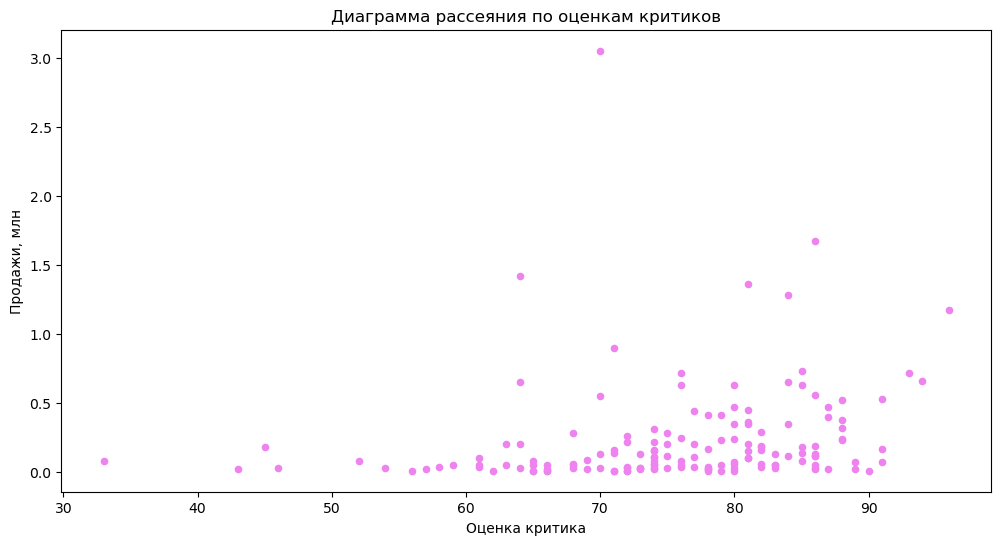


Корреляция между оценками пользователей и продажами для WiiU 
 0.41933048192661854


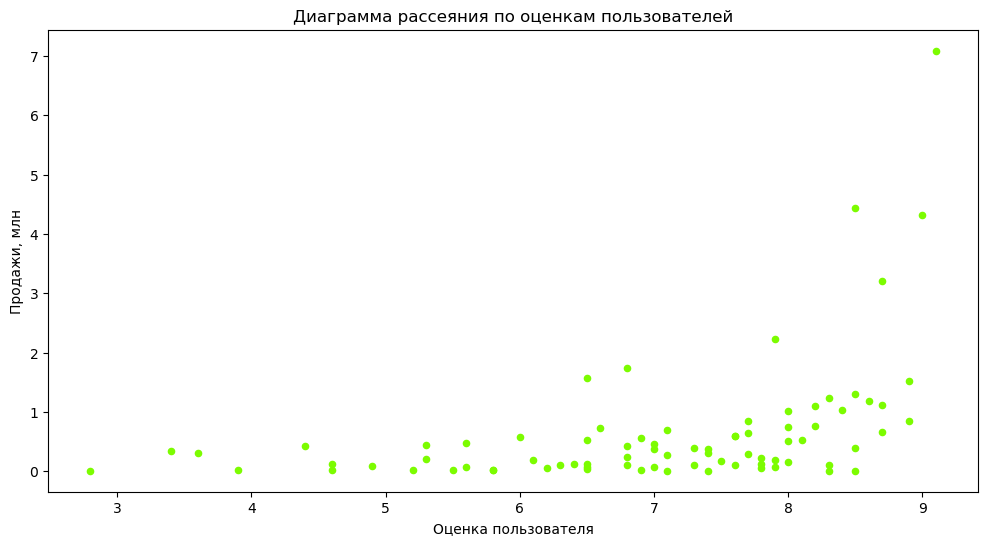

Корреляция между оценками критиков и продажами для WiiU 
 0.37641490654239124



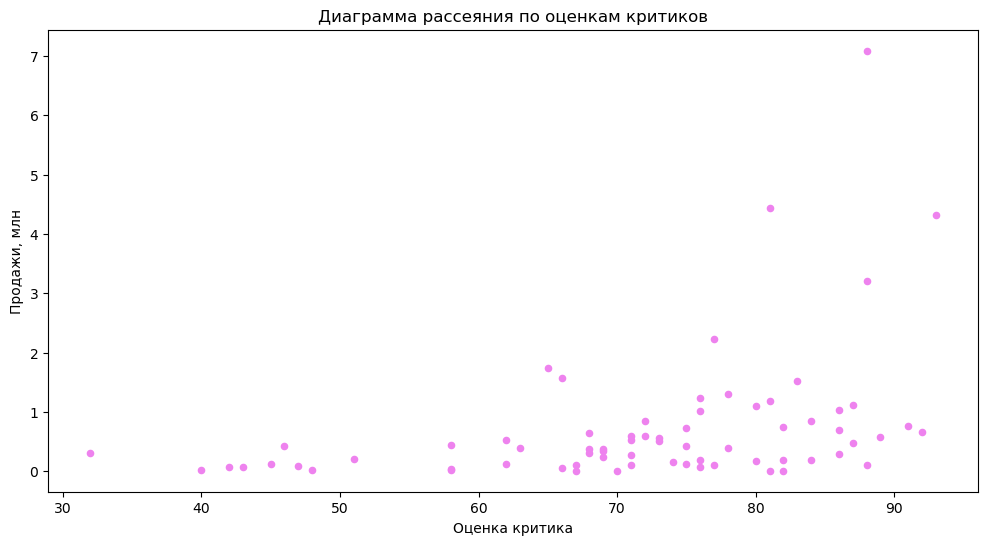


Корреляция между оценками пользователей и продажами для PSV 
 0.000942472331910853


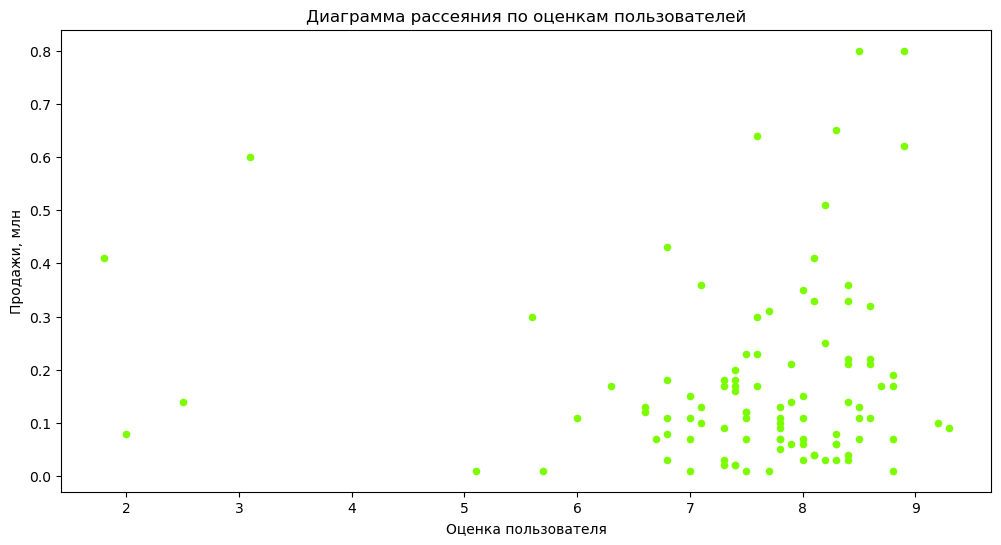

Корреляция между оценками критиков и продажами для PSV 
 0.2547423503068656



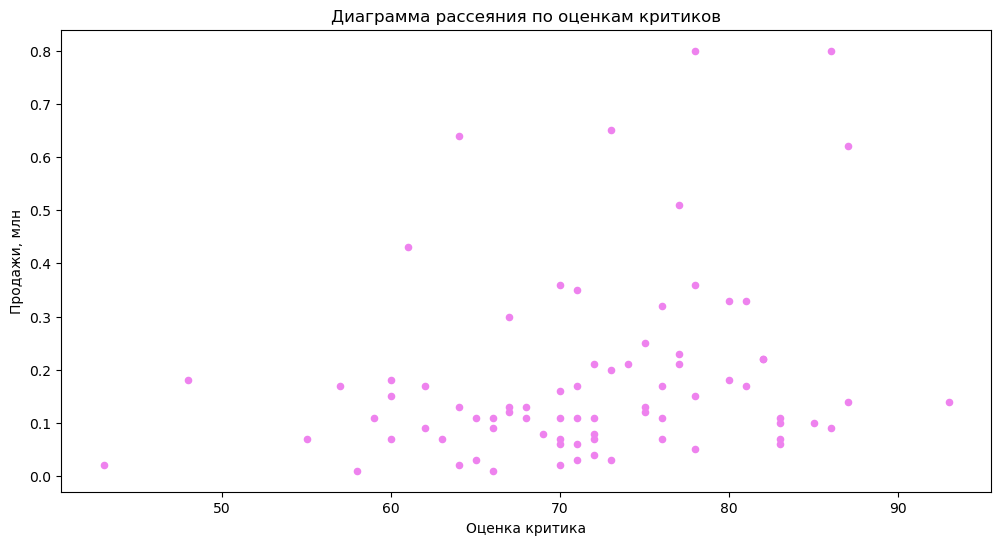

In [46]:
for i in list_of_platform[:6].index:
    print('Корреляция между оценками пользователей и продажами для', i , '\n',
      new_period_games[new_period_games['platform']==i]['user_score'].corr
      (new_period_games[new_period_games['platform']==i]['sum_sales']))
    new_period_games[new_period_games['platform']==i].plot(
    kind='scatter',y='sum_sales',x='user_score', figsize=(12,6), 
    color = 'lawngreen', title = 'Диаграмма рассеяния по оценкам пользователей', 
    xlabel='Оценка пользователя', ylabel='Продажи, млн')
    plt.show()
    print('Корреляция между оценками критиков и продажами для', i,  '\n',
      new_period_games[new_period_games['platform']==i]['critic_score'].corr
      (new_period_games[new_period_games['platform']==i]['sum_sales']))
    print()
    new_period_games[new_period_games['platform']==i].plot(
    kind='scatter',y='sum_sales',x='critic_score', figsize=(12,6), 
    color = 'violet', title = 'Диаграмма рассеяния по оценкам критиков', 
    xlabel='Оценка критика', ylabel='Продажи, млн')
    plt.show()
    print()

Те же выводы можно сделать и по другим платформам. Игроки чаще прислушиваются к мнению критков, чем других юзеров.  
Исключением является WiiU. Корреляция между отзывами пользователей и продажами даже выше, чем корреляция между отзывами критиков и игровой платформой. Тяжело предположить, чем это может быть вызвано.

### 3.7 Общее распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам по сумме продаж

In [47]:
new_period_games.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values(
    by='sum_sales', ascending=False)

,sum_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Посмотрим на общее распределение игр по жанрам по медианным продажам

(0.0, 1.5)

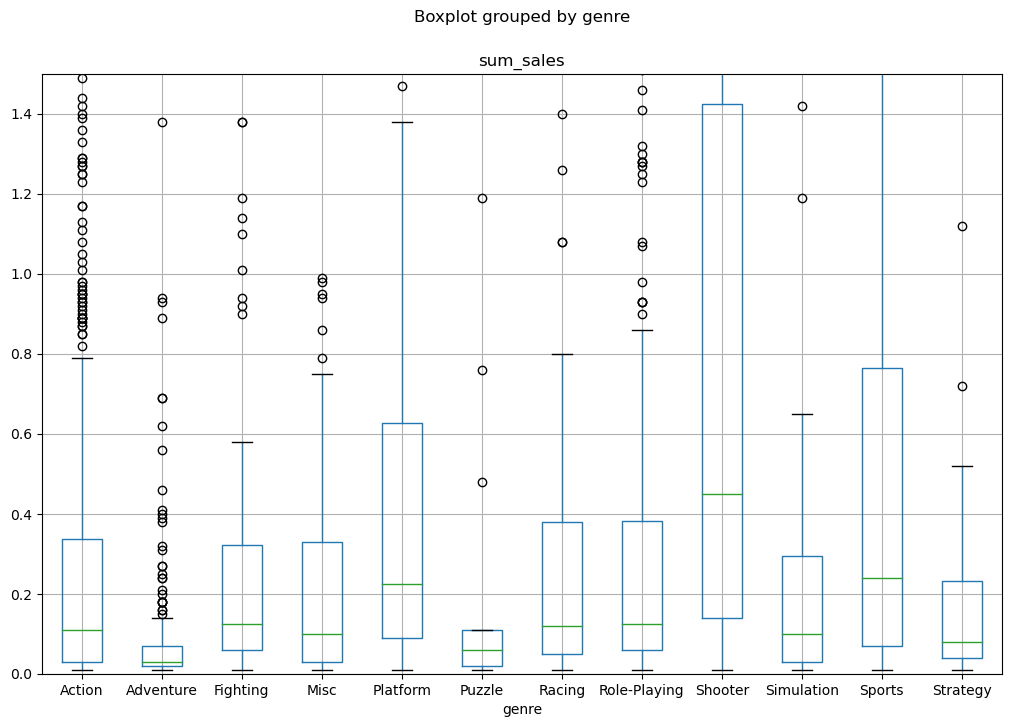

In [48]:
new_period_games.boxplot(column='sum_sales', by='genre', figsize=(12,8))
plt.ylim(0, 1.5)

Лидерами среди жанров по максимальным продажам являются Action, Shooter и Role-Playing, а вот по медианным продажам лидируют Shooter, Sports и Platform. Жанр Shooter является самым прибыльным. А вот жанром с самыми низкими продажами является Adventure. Если отталкиваться распределения, то можно утверждать, что жанр напрямую влияет на продажи.

**Вывод:**  
 - В период с 1990 по 2007 количество игр ежегодно растет, а в следующий период постепенно падает.  
 - Cамыми популярными платформами за весь период являются PS2, X360, PS3, WII, DS, PS.
 - Средняя продолжительность жизни игровых платформ составляет около 9 лет.
 - Лидеры продаж за весь период уже не являются актуальными на 2016 год, а многие даже ушли с рынка. Их заменило новое поколение от тех же разработчиков игровых плтформ: PS4, XOne, 3DS, WiiU, PS3, PC.
 - Актуальным периодом будем считать последние 4 года.
 - Лидируют X360, XOne и PS4 в данном периоде. 
 - PSV и PC на данном промежутке времени уступают более современным приставкам.
 - Игроки чаще прислушиваются к мнению критков, чем других юзеров. Исключением является WiiU. 
 - Жанр предположительно напрямую влияет на продажи. Лидерами среди жанров являются Shooter, Sports и Platform. Жанром с самыми низкими продажами является Adventure. 

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP): 5 самых популярных платформ, жанров и рейтингов

          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20
              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
            na_sales
rating              
M             165.21
not_reting     89.42
E              79.05
E10+           54.24
T              49.79

          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96
              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
            eu_sales
rating              
M             145.32
E              83.36
not_reting     78.91
E10+           42.69
T              41.95

          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
Wi

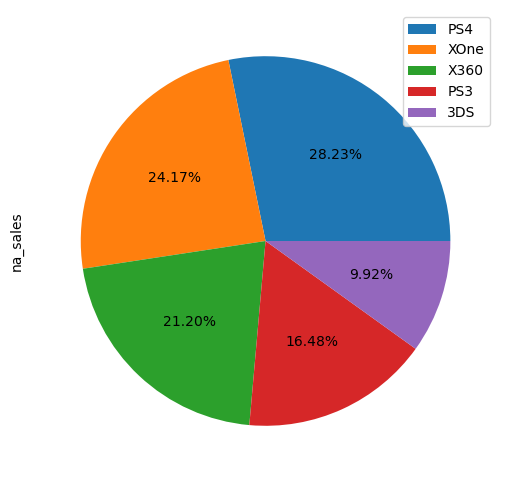

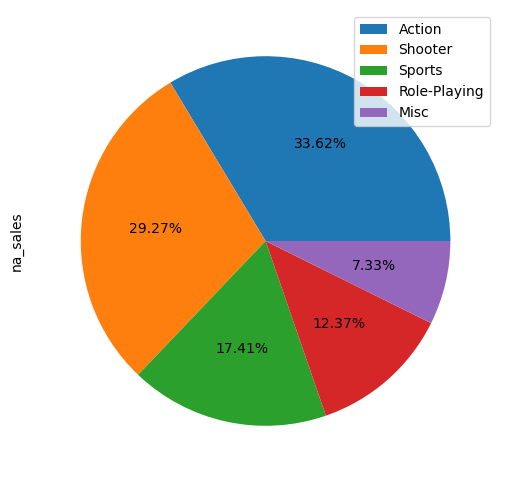

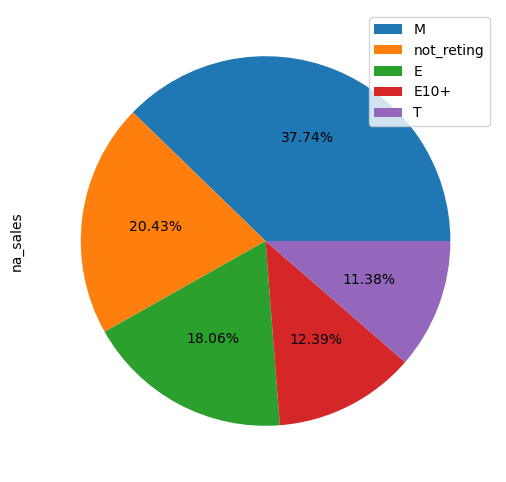

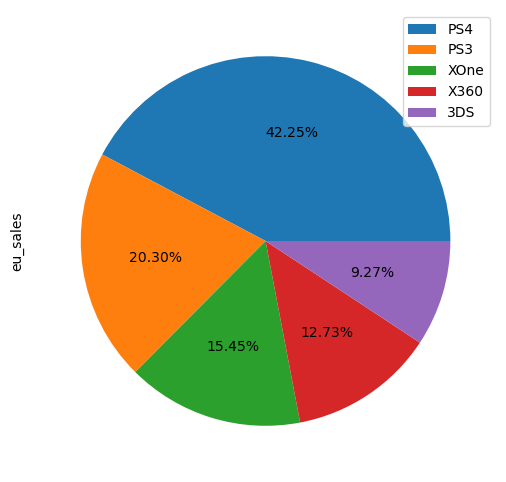

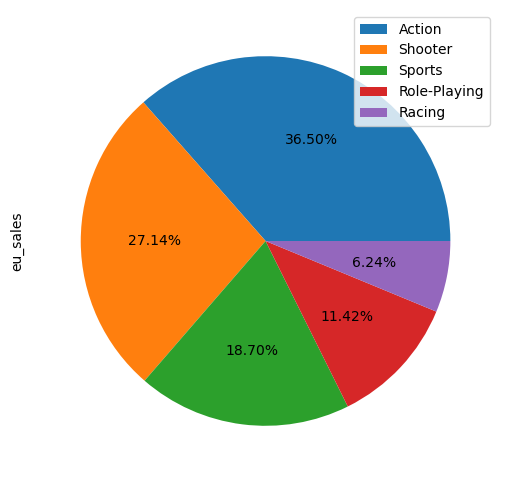

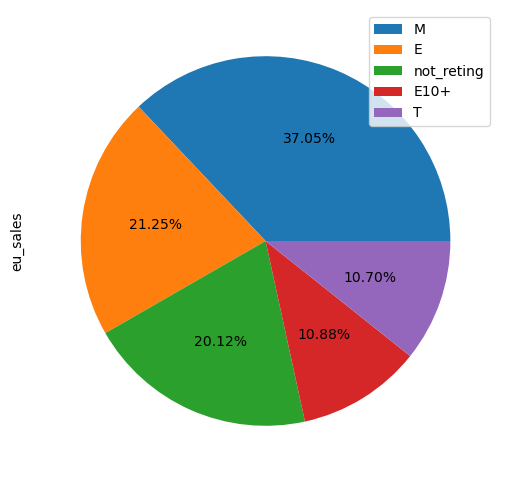

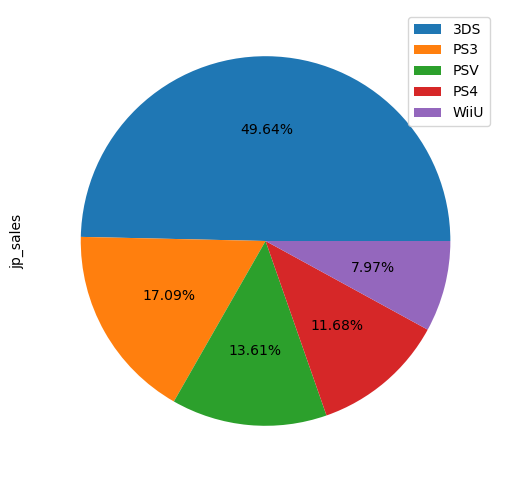

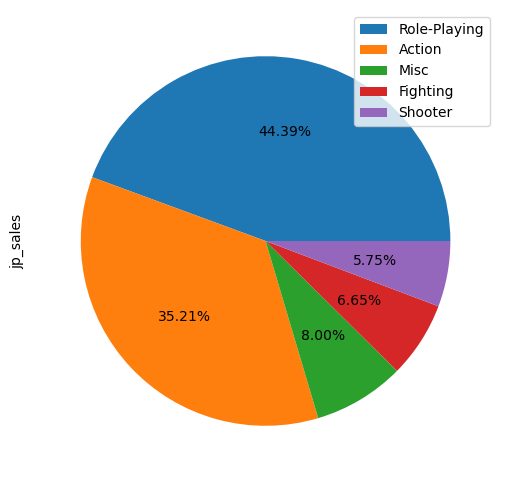

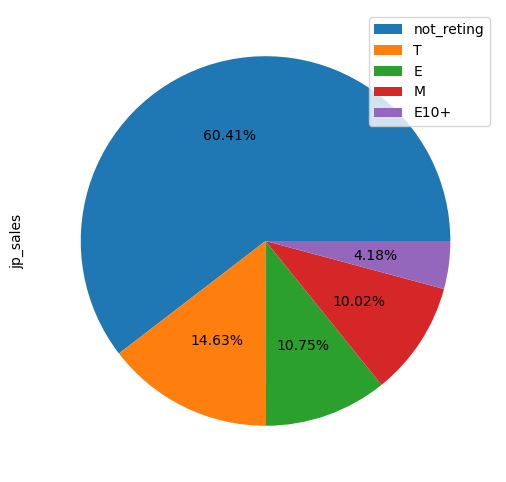

In [49]:
list_criterion = ['platform','genre','rating']
list_area = ['na_sales', 'eu_sales', 'jp_sales']
for area in list_area:
    for criterion in list_criterion:
            pivot = (new_period_games.pivot_table(index=criterion, values=area, aggfunc='sum')
                     .sort_values(by=area, ascending=False))[:5]
            pivot.plot(kind='pie', 
                       figsize=(12, 6), subplots=True, labeldistance=None, autopct='%1.2f%%')
            print(pivot)
    print()

**Вывод:**

*Северная Америка:*  
 - Топ игровых приставок: PS4, Xone, X360, PS3, 3DS.
 - Топ жанров игр: Action, Shooter, Sports, Role-Playing, Misc.
 - Топ рейтингов игр : M, not_rating, E, E10+.  
   
   
*Европа:*  
 - Топ игровых приставок: PS4, PS3, Xone, X360, 3DS.
 - Топ жанров игр: Action, Shooter, Sports, Role-Playing, Racing.
 - Топ рейтингов: M, E, not_rating, E10+, T.
  
  
*Япония:*  
 - Топ игровых приставок: 3DS, PS3, PSV, PS4, WiiU.
 - Топ жанров игр: Role-Playing, Action, Misc, Fighting, Shooter.
 - Топ рейтингов: not_rating, T, E, M, E10+.

В Европе и Северной Америке показатели основных показателей очень схожи, что существенно отличается от показателей Японии. Разницу в долях продаж по различным платформа Американско-Европейской группы с Японской можно обосновать различной культурой. В Японии люди отдают предпочтение более портативным устройствам, а у других более актуальными являются стационарные. Той же причиной можно обосновать разницу в жанрах и рейтингах. Ролевые игры в Японии являются более предпочтительными, чем шутеры в других регионах. А вот экшен любят и те и другие. Вероятно, что это связано с популярностью иных игр и жанров в отличие от других регионов из чего можно сделать вывод, что рейтинг влияет на продажи в отдельных регионах.
Что касается рейтинга, то в Японии самый популярные игры остались без рейтинга, как и немалая часть в иных регионах. Поэтому можно предположить, что положение рейтинга лучше изключить из оценки прогнозов. 


In [50]:
temp = games[games['year_of_release'] > 2012].copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


not_reting    977
M             369
T             333
E             302
E10+          252
Name: rating, dtype: int64

 ## Проверка гипотез

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Определим выборки и избавимся от пропусков

In [51]:
xone = new_period_games[new_period_games['platform']=='XOne']['user_score'].dropna()
pc = new_period_games[new_period_games['platform']=='PC']['user_score'].dropna()

Посчитаем средний рейтинг пользователя для платформ

In [52]:
print('Средний рейтинг пользователя для Xbox One', xone.mean())
print('Средний рейтинг пользователя для PC',pc.mean())

Средний рейтинг пользователя для Xbox One 6.52142857142857
Средний рейтинг пользователя для PC 6.269677419354836


Посчитаем средний рейтинг пользователя для платформ

In [53]:
print('Дисперсия Xbox One',np.var(xone))
print('Дисперсия PC',np.var(pc))

Дисперсия Xbox One 1.8965188383045533
Дисперсия PC 3.0163063475546332


Выполним проверку нулевой гипотезы

In [54]:
alpha = .05

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Значение p-value равно 15%. Нулевую гипотезу не получилось опровергнуть. Значит можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC не такие уж и разные.

### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем гипотезы:  

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые;  
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

Определим выборки и избавимся от пропусков

In [55]:
action = new_period_games[new_period_games['genre']=='Action']['user_score'].dropna()
sports = new_period_games[new_period_games['genre']=='Sports']['user_score'].dropna()

Посчитаем средний рейтинг пользователя для жанров

In [56]:
print('Средний рейтинг пользователя для Action', action.mean())
print('Средний рейтинг пользователя для Sports',sports.mean())

Средний рейтинг пользователя для Action 6.837532133676097
Средний рейтинг пользователя для Sports 5.238124999999999


Посчитаем средний рейтинг пользователя для жанров

In [57]:
print('Дисперсия Action',np.var(action))
print('Дисперсия Sports',np.var(sports))

Дисперсия Action 1.764812418633236
Дисперсия Sports 3.1607339843749975


Выполним проверку нулевой гипотезы

In [58]:
alpha = .05

results = st.ttest_ind(action, sports, equal_var=False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод:**  
Исходя из значения p-value нулевая гипотеза была отвергнута. Таким образом, мы имеем малую вероятность получить одинакове средние рейнтинги по двум жанрам.
В проверке использовалась ttest_ind для проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Аргумент equal_var=False был введен, так как дисперсии двух выборок были различны.

## Вывод

1. **Знакомство с данными**  

  Для анализы были получены данные о данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
  В данных много пропущенных значений в столбцах Critic_Score, User_Score, Year_of_Release, Rating.   В столбце с оценкой пользователей встречается аббревиатура 'tbd'. Тип данных в столбце Year_of_Release следует заменить.      
  
  
2. **Предобработка данных**   

  Было приведено название столбцов к нижниму регистру (чего делать, ксати, не стоило (это ни на что не повлияло, а графики и таблицы визуально смотрелись нелепо), но когда я это поняла мне было уже лень исправлять), изменены типы данных, частично заполнены пропуски в столбце с годом выхода.
  Аббревиатура 'tbd' расшифровывается как 'Предстоит определить', что равнозначно пропуску. Была проведена замена на nan для проведения дальнейшего анализа. 
  Частично были удалены пропуски.
  Ранее выдвинутая гипотеза о зависимости пропусков в оценках пользователей и критиков, а так же рейтинга от года выпуска не подтвердилась. Пропуски в столбцах с оценкой и рейтингом не заполнялись, так как это могло сказаться на анализе.   
  
  
3. **Исследовательский анализ данных**    

  В период с 1990 по 2007 количество игр ежегодно растет, а в следующий период постепенно падает.
  Cамыми популярными платформами за весь период являются PS2, X360, PS3, WII, DS, PS.
  Средняя продолжительность жизни игровых платформ составляет около 9 лет.
  Лидеры продаж за весь период уже не являются актуальными на 2016 год, а многие даже ушли с рынка. Их заменило новое поколение от тех же разработчиков игровых плтформ: PS4, XOne, 3DS, WiiU, PS3, PC.
  Актуальным периодом будем считать последние 4 года.
  Лидируют X360, XOne и PS4 в данном периоде.
  PSV и PSP на данном промежутке времени уступают более современным приставкам.
  Игроки чаще прислушиваются к мнению критков, чем других юзеров. Исключением является WiiU. 
  Лидерами среди жанров по максимальным продажам являются Action, Shooter и Role-Playing, а вот по медианным продажам лидируют Shooter, Sports и Platform. Жанр Shooter является самым прибыльным. А вот жанром с самыми низкими продажами является Adventure. Если отталкиваться распределения, то можно утверждать, что жанр напрямую влияет на продажи.    
  
  
4. **Портрет пользователя каждого региона**  

- Северная Америка:   
    Топ игровых приставок: PS4, Xone, X360, PS3, 3DS.  
    Топ жанров игр: Action, Shooter, Sports, Role-Playing, Misc.  
    Топ рейтингов игр : M, not_rating, E, E10+, T.  
      
- Европа:  
    Топ игровых приставок: PS4, PS3, Xone, X360, 3DS.   
    Топ жанров игр: Action, Shooter, Sports, Role-Playing, Racing.  
    Топ рейтингов: M, E, not_rating, E10+, T.   
    
- Япония:  
    Топ игровых приставок: 3DS, PS3, PSV, PS4, WiiU. 
    Топ жанров игр: Role-Playing, Action, Misc, Fighting, Shooter.  
    Топ рейтингов: not_rating, T, E, M, E10+.  
    
    В Европе и Северной Америке показатели основных показателей очень схожи, что существенно отличается от показателей Японии. Разницу в долях продаж по различным платформа Американско-Европейской группы с Японской можно обосновать различной культурой. В Японии люди отдают предпочтение более портативным устройствам, а у других более актуальными являются стационарные. Той же причиной можно обосновать разницу в жанрах и рейтингах. Ролевые игры в Японии являются более предпочтительными, чем шутеры в других регионах. А вот экшен любят и те и другие. Вероятно, что это связано с популярностью иных игр и жанров в отличие от других регионов из чего можно сделать вывод, что рейтинг влияет на продажи в отдельных регионах. Что касается рейтинга, то в Японии самый популярные игры остались без рейтинга, как и немалая часть в иных регионах.
    
5. **Проверка гипотез**  

    Гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" не получилось опровергнуть. Значит можно сделать вывод, что получить различные средние пользовательские рейтинги платформ Xbox One и PC невелика.  
    Гипотеза "Средние пользовательские рейтинги жанров Action и Sports одинаковые" была отвергнута. Таким образом, мы имеем малую вероятность получить одинакове средние рейнтинги по двум жанрам. 

**По итогам можно сделать прогноз на 2017 год в игровой индустрии:**

      Самой популярной платформой на рынке в Европе и Северной Америке являются PS4. В Японии она входит в топ 5, но лидирующую позицию занимает 3DS.  
      Большинство регионов склоняется к жанру Action, хотя в Японии он занимает второе место, а первое отведено Role-Playing. В топ самых популярных жанров по всем регионам входят Action, Shooter, Sports, Role-Playing и Misc.  
      Самымыми популярныи рейтингами от организации ESRB можно считать категории M и E. Исключением является та же Япония, у нее лидирующий рейтинг T, после котегории без рейтинга. В Японии самый популярные игры остались без рейтинга, как и немалая часть в иных регионах. Поэтому можно предположить, что положение рейтинга лучше изключить из оценки прогнозов.  
      Исходя из всего вышесказанного, предпочтительными для Европы и Америки является платформа PS4, жанры Action, Shooter. Для Японии предпочтительными платформами будут 3DS, PS3, жанрами Role-Playing, Action. Поэтому важно обращать внимание на регион при планировании рекламной кампании. 